In [4]:
#import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
import calendar
import os

In [1]:
from google.colab import files
uploaded = files.upload()

In [6]:
#read files
#clean fake news
#create new columns
#merge fake and true news

fakeNews = pd.read_csv("/content/Fake.csv")
fakeNews.insert(0, 'fake/true', 'Fake')

fakeNews['date'] = pd.to_datetime(fakeNews['date'],errors='coerce')
fakeNews['year'] = pd.DatetimeIndex(fakeNews['date']).year.fillna(0).astype(int)
fakeNews['month'] = pd.DatetimeIndex(fakeNews['date']).month.fillna(0).astype(int)


trueNews = pd.read_csv("/content/True.csv")
trueNews.insert(0, 'fake/true', 'True')
trueNews['date'] = pd.to_datetime(trueNews['date'], format = '%Y,%m,%d', errors='ignore')
trueNews['year'] = pd.DatetimeIndex(trueNews['date']).year
trueNews['month'] = pd.DatetimeIndex(trueNews['date']).month

news = pd.concat([fakeNews,trueNews])
news

,fake/true,title,text,subject,date,year,month
0,Fake,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,2017-12-31 00:00:00,2017,12
1,Fake,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,2017-12-31 00:00:00,2017,12
2,Fake,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,2017-12-30 00:00:00,2017,12
3,Fake,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,2017-12-29 00:00:00,2017,12
4,Fake,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,2017-12-25 00:00:00,2017,12
...,...,...,...,...,...,...,...
21412,True,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017",2017,8
21413,True,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017",2017,8
21414,True,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017",2017,8
21415,True,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017",2017,8


In [7]:
newsgroupby_1 = news.groupby(['subject','fake/true'],as_index=False)['text'].count()
newsgroupby_1

,subject,fake/true,text
0,Government News,Fake,1570
1,Middle-east,Fake,778
2,News,Fake,9050
3,US_News,Fake,783
4,left-news,Fake,4459
5,politics,Fake,6841
6,politicsNews,True,11272
7,worldnews,True,10145


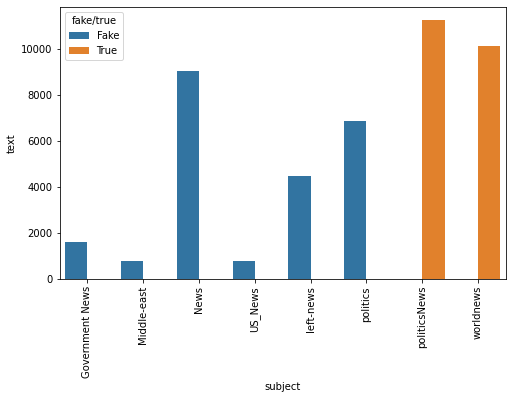

In [58]:
plt.figure(figsize=(8,5))
news_fig1 = sns.barplot(x='subject',y='text',hue= 'fake/true',data =newsgroupby_1)
plt.xticks(rotation='vertical')
news_fig1

In [59]:
#news.describe().head(20)

### Note: 
#### True news have only 2 subjects; politicsNews and worldNews
#### Fake news have 6 different subjects; Government News, Middle-east, News, US_News, left-news and politics


In [60]:
newsgroupby_2=news.groupby(['fake/true','month'],as_index=False)['title'].count()
newsgroupby_2

,fake/true,month,title
0,Fake,0,10
1,Fake,1,2110
2,Fake,2,1934
3,Fake,3,2162
4,Fake,4,2108
5,Fake,5,2177
6,Fake,6,1921
7,Fake,7,1951
8,Fake,8,1907
9,Fake,9,1774


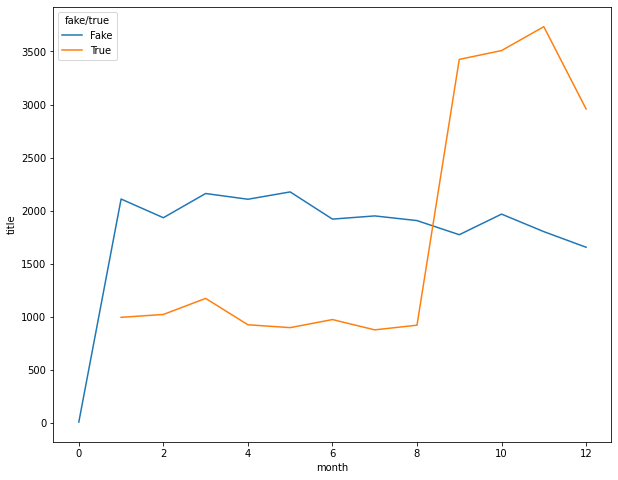

In [61]:
plt.figure(figsize=(10,8))
news_fig2 = sns.lineplot(x='month',y='title',hue= 'fake/true',data =newsgroupby_2)
news_fig2

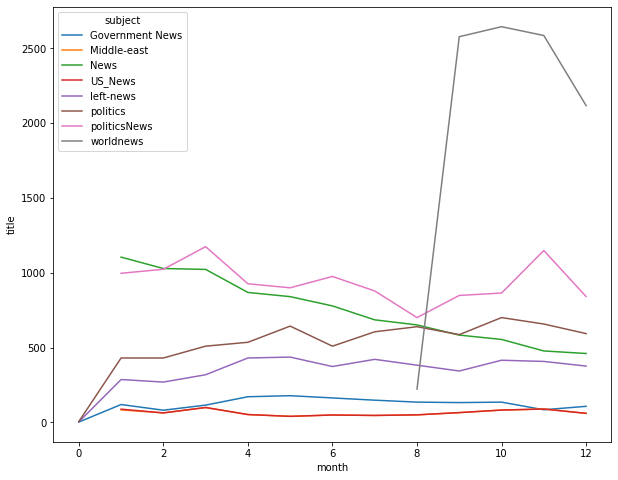

In [62]:
newsgroupby_3=news.groupby(['subject','month'],as_index=False)['title'].count()

plt.figure(figsize=(10,8))
news_fig3 = sns.lineplot(x='month',y='title',hue= 'subject',data =newsgroupby_3)
news_fig3

### Note:
#### Dates for fake news was steady from the 1st month up till the 12th month. The total number of news for each month ranged between 1,600 and a little over 2,000
#### For true news, the count for each month up till the 8th month was a little below or above 1,000. By the 9th month, total number of news per month progressed to somewhere between 3,000 and 3,500 and progressed till November until the number dropped again in December. The news subject that caused true news to shoot up is 'world news'

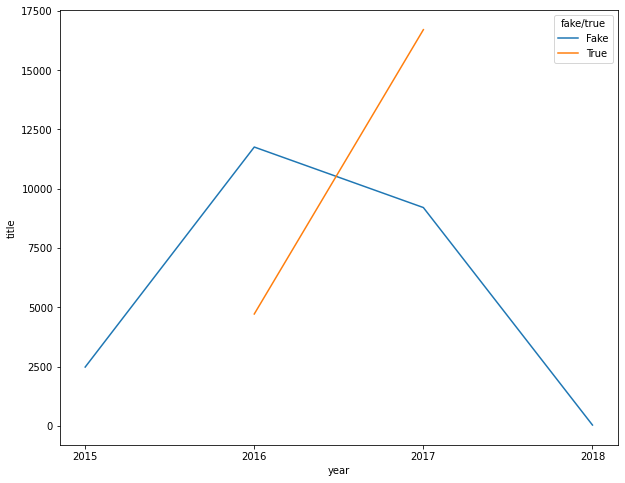

In [63]:
newsgroupby_4 = news.groupby(['fake/true','year'],as_index=False)['title'].count().drop(0)
#newsgroupby_4['year'] = pd.to_datetime(newsgroupby_4['year'])
newsgroupby_4['year'] =newsgroupby_4['year'].astype(str)
newsgroupby_4

plt.figure(figsize=(10,8))
news_fig4 = sns.lineplot(x='year',y='title',hue= 'fake/true',data =newsgroupby_4)
news_fig4

### Note: 
#### Years for fake news range from 2015 to 2018
#### true news were published between 2016 and 2017 
#### Altogether the highest number of news was in 2017

## VIEWING MOST COMMON WORDS

In [64]:
pip install wordcloud

In [65]:
from wordcloud import WordCloud, STOPWORDS

In [66]:
pip install pillow

In [67]:
from PIL import Image

In [68]:
#?WordCloud

There are 2235344 words in the combination of all words.
FAKE NEWS BY TITLE


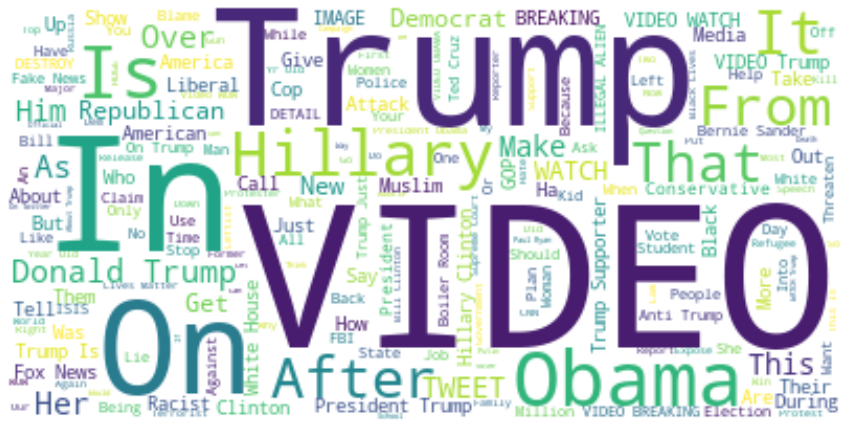

In [69]:
text = " ".join(word for word in fakeNews.title)
print ("There are {} words in the combination of all words.".format(len(text)))
print ("FAKE NEWS BY TITLE")

stopwords = (["a", "the", "for", "us", "of","his","to","by","at","not","be","will","and","with"])

wordcloud = WordCloud(stopwords=stopwords,background_color="white").generate(text)
plt.figure(figsize=(15,15))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

FAKE NEWS BY TEXT


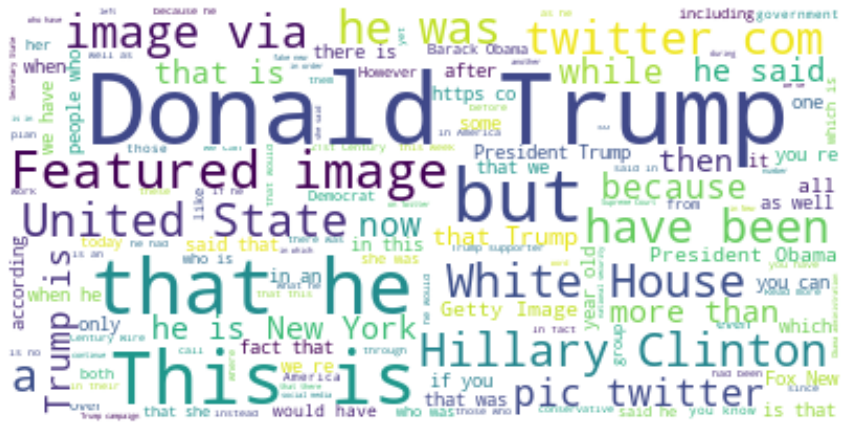

In [70]:
text = " ".join(word for word in fakeNews.text)
print ("FAKE NEWS BY TEXT")

stopwords = (["a", "the", "for", "us", "of","his","to","by","at","not","be","will","and","with", "has", "or", "it", "they", "are"])

wordcloud = WordCloud(stopwords=stopwords,background_color="white").generate(text)
plt.figure(figsize=(15,15))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

There are 1406408 words in the combination of all words.
TRUE NEWS BY TITLE


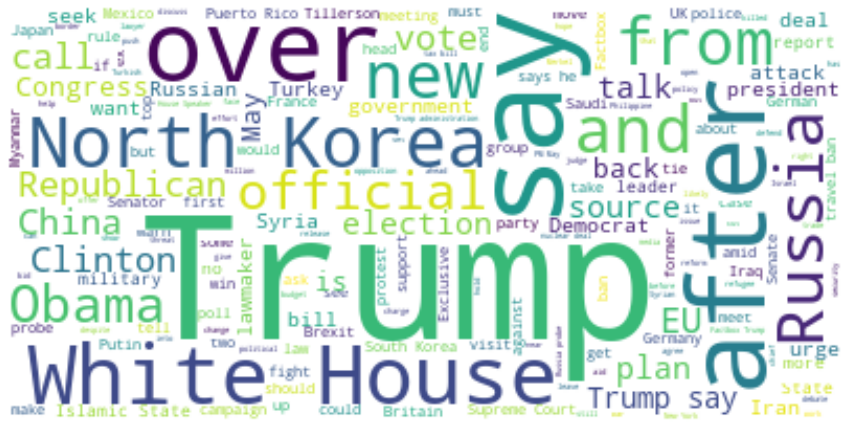

In [71]:
text = " ".join(word for word in trueNews.title)
print ("There are {} words in the combination of all words.".format(len(text)))
print ("TRUE NEWS BY TITLE")

stopwords = (["a", "the", "for", "us", "of","his","to","by","at","not","be","will","in","as","on","with"])


wordcloud = WordCloud(stopwords=stopwords,background_color="white").generate(text)
plt.figure(figsize=(15,15))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

TRUE NEWS BY TEXT


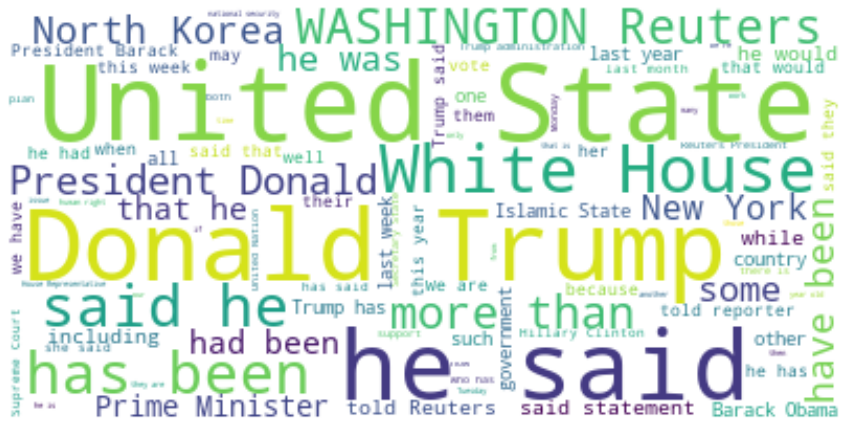

In [72]:
text = " ".join(word for word in trueNews.text)
print ("TRUE NEWS BY TEXT")

stopwords = (["a", "the", "for", "us", "of","his","to","by","at","not","be","will","in","as","on","with","and","or","but","it"])


wordcloud = WordCloud(stopwords=stopwords,background_color="white").generate(text)
plt.figure(figsize=(15,15))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

ALL NEWS BY TITLE


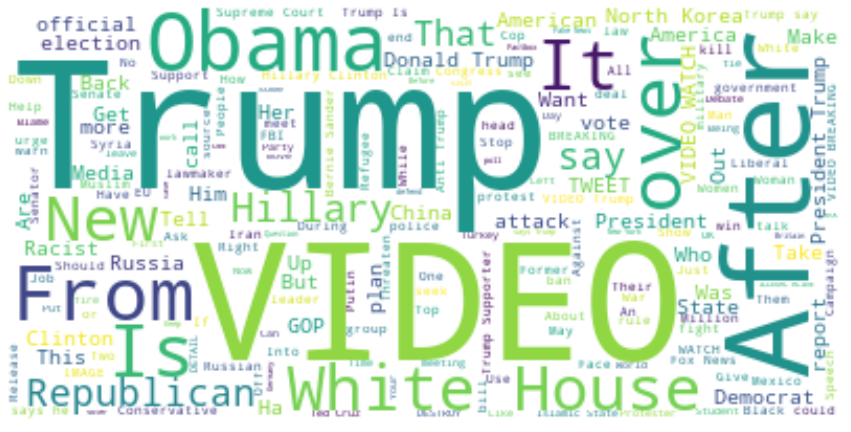

In [73]:
text = " ".join(word for word in news.title)
print ("ALL NEWS BY TITLE")

stopwords = (["a", "the", "for", "us", "of","his","to","by","at","not","be","will","in","as","on","with","and"])


wordcloud = WordCloud(stopwords=stopwords,background_color="white").generate(text)
plt.figure(figsize=(15,15))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

**Tokenization and ML by Olasumbo**
To get a swift preview of data, and predict we include prob(True/False), to do this we begin with tokenization and lemmatization of text

In [8]:
news.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44898 entries, 0 to 21416
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   fake/true  44898 non-null  object
 1   title      44898 non-null  object
 2   text       44898 non-null  object
 3   subject    44898 non-null  object
 4   date       44888 non-null  object
 5   year       44898 non-null  int64 
 6   month      44898 non-null  int64 
dtypes: int64(2), object(5)
memory usage: 2.7+ MB


In [9]:
#Shuffling to see some fake news
news.sample(frac = 1)

,fake/true,title,text,subject,date,year,month
815,Fake,"32 Million Uninsured, Premiums To Double If O...",A new report released by the Congressional Bud...,News,2017-07-20 00:00:00,2017,7
10699,Fake,PRESIDENT TRUMP’S REMARKS at Ford’s Theatre Ga...,PRESIDENT TRUMP and FIRST LADY MELANIA TRUMP a...,politics,2017-06-04 00:00:00,2017,6
18176,True,"Trump expected to decertify Iran nuclear deal,...",WASHINGTON (Reuters) - President Donald Trump ...,worldnews,"October 5, 2017",2017,10
8320,Fake,You Won’t Believe What Hit This Pro-TPP Polit...,George W. Bush was famously attacked with flyi...,News,2016-02-05 00:00:00,2016,2
20838,True,Nigeria's Buhari said he would not seek re-ele...,LAGOS (Reuters) - Nigeria s President Muhammad...,worldnews,"September 6, 2017",2017,9
...,...,...,...,...,...,...,...
21939,Fake,U.S. State Dept. Spox: ‘Everybody wants Assad ...,21st Century Wire says At Tuesday s U.S. State...,US_News,2017-11-30 00:00:00,2017,11
16217,Fake,WHERE’S THE OVERSIGHT? OBAMA FUNNELED BILLIONS...,Advocates for big government and progressive ...,Government News,2017-03-02 00:00:00,2017,3
6548,True,U.S. House Republicans weaken ethics body as t...,WASHINGTON (Reuters) - Republicans in the U.S....,politicsNews,"January 3, 2017",2017,1
20266,True,Catalan police say Sagrada Familia bomb scare ...,MADRID (Reuters) - Catalan police declared a f...,worldnews,"September 12, 2017",2017,9


In [10]:
#We will concatenate title, text and subject to create the article feature for ML prediction
news['article'] = news['title']+""+news['text']+""+news['subject']

In [11]:
#final and total Dataframe with article and check.
df = news[['article','fake/true']]

In [12]:
# for an easy analysis we convert all text to lower case

df['article'] = df['article'].apply(lambda x: x.lower())

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [13]:
df['article'].head()

0     donald trump sends out embarrassing new year’...
1     drunk bragging trump staffer started russian ...
2     sheriff david clarke becomes an internet joke...
3     trump is so obsessed he even has obama’s name...
4     pope francis just called out donald trump dur...
Name: article, dtype: object

In [14]:
# define punctuation function and removing punctuation from article column created
import string

def punctuation_removal(bad_str):
    clean_list = [char for char in bad_str if char not in string.punctuation]
    clean_str = ''.join(clean_list)
    return clean_str

In [15]:
df['article'] = df['article'].apply(punctuation_removal)
df['article'].head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


0     donald trump sends out embarrassing new year’...
1     drunk bragging trump staffer started russian ...
2     sheriff david clarke becomes an internet joke...
3     trump is so obsessed he even has obama’s name...
4     pope francis just called out donald trump dur...
Name: article, dtype: object

In [16]:
!pip install nltk

In [17]:
import nltk
nltk.download("popular")

[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to /root/nltk_data...
[nltk_data]    |   Package cmudict is already up-to-date!
[nltk_data]    | Downloading package gazetteers to /root/nltk_data...
[nltk_data]    |   Package gazetteers is already up-to-date!
[nltk_data]    | Downloading package genesis to /root/nltk_data...
[nltk_data]    |   Package genesis is already up-to-date!
[nltk_data]    | Downloading package gutenberg to /root/nltk_data...
[nltk_data]    |   Package gutenberg is already up-to-date!
[nltk_data]    | Downloading package inaugural to /root/nltk_data...
[nltk_data]    |   Package inaugural is already up-to-date!
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package movie_reviews is already up-to-date!
[nltk_data]    | Downloading package names to /root/nltk_data...
[nltk_data]    |   Package names is already up-to-date!
[nltk_data]    | Do

True

In [18]:
#using NLTK library, we can do lot of text preprocesing
from nltk.tokenize import word_tokenize
articles = df.article.str.cat(sep=' ')
#function to split text into word
tokens = word_tokenize(articles)
vocabulary = set(tokens)
print(len(vocabulary))
frequency_dist = nltk.FreqDist(tokens)
sorted(frequency_dist,key=frequency_dist.__getitem__, reverse=True)[0:50]

252403


['the',
 'to',
 'of',
 'a',
 'and',
 'in',
 'that',
 's',
 'on',
 'for',
 'is',
 'trump',
 'he',
 'said',
 'it',
 'with',
 'was',
 'as',
 'his',
 'by',
 'has',
 'not',
 '’',
 'be',
 'have',
 'from',
 'at',
 'this',
 'are',
 'who',
 'us',
 'an',
 'they',
 'i',
 'we',
 '”',
 '“',
 'but',
 'would',
 'president',
 'about',
 'will',
 't',
 'their',
 'you',
 'had',
 'been',
 'people',
 'were',
 'more']

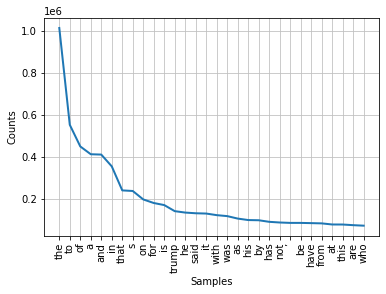

In [85]:
 frequency_dist.plot(30,cumulative=False)

In [86]:
nltk.FreqDist(tokens)

FreqDist({'donald': 27350,
          'trump': 140275,
          'sends': 331,
          'out': 34655,
          'embarrassing': 732,
          'new': 31815,
          'year': 17724,
          '’': 84299,
          's': 236422,
          'eve': 353,
          'message': 3591,
          'this': 76534,
          'is': 169236,
          'disturbingdonald': 1,
          'just': 25819,
          'couldn': 1710,
          't': 49884,
          'wish': 838,
          'all': 34000,
          'americans': 8943,
          'a': 411627,
          'happy': 1296,
          'and': 410048,
          'leave': 3523,
          'it': 128832,
          'at': 76701,
          'that': 239268,
          'instead': 4142,
          'he': 133480,
          'had': 46295,
          'to': 551938,
          'give': 5540,
          'shout': 137,
          'his': 97849,
          'enemies': 605,
          'haters': 121,
          'the': 1013623,
          'very': 13922,
          'dishonest': 345,
          'fake': 373

In [87]:
frequency_dist.most_common(10)

[('the', 1013623),
 ('to', 551938),
 ('of', 448809),
 ('a', 411627),
 ('and', 410048),
 ('in', 353822),
 ('that', 239268),
 ('s', 236422),
 ('on', 196163),
 ('for', 179124)]

In [19]:
# Let us remove the stop words to further cleanup the text corpus.
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
tokens = [w for w in tokens if not w in stop_words]

In [20]:
#Alternatively
#Removing stopwords

from nltk.corpus import stopwords
stop = stopwords.words('english')

df['article'].apply(lambda x: [item for item in x if item not in stop])

0        [ , n, l,  , r, u, p,  , e, n,  , u,  , e, b, ...
1        [ , r, u, n, k,  , b, r, g, g, n, g,  , r, u, ...
2        [ , h, e, r, f, f,  , v,  , c, l, r, k, e,  , ...
3        [ , r, u, p,  ,  ,  , b, e, e,  , h, e,  , e, ...
4        [ , p, p, e,  , f, r, n, c,  , j, u,  , c, l, ...
                               ...                        
21412    [f, u, l, l,  , c, e,  , n,  , b, c, k,  , n, ...
21413    [l, e, x, n, e, x,  , w, h, r, e, w,  , w,  , ...
21414    [n, k,  , c, u, l, u, r, l,  , h, u, b,  , b, ...
21415    [v, c, n,  , u, p, b, e,  , n,  , p, b, l,  , ...
21416    [n, n, e,  ,  , b, u,  , 1, 1, 4,  , b, l, l, ...
Name: article, Length: 44898, dtype: object

In [21]:
df['article']

0         donald trump sends out embarrassing new year’...
1         drunk bragging trump staffer started russian ...
2         sheriff david clarke becomes an internet joke...
3         trump is so obsessed he even has obama’s name...
4         pope francis just called out donald trump dur...
                               ...                        
21412    fully committed nato backs new us approach on ...
21413    lexisnexis withdrew two products from chinese ...
21414    minsk cultural hub becomes haven from authorit...
21415    vatican upbeat on possibility of pope francis ...
21416    indonesia to buy 114 billion worth of russian ...
Name: article, Length: 44898, dtype: object

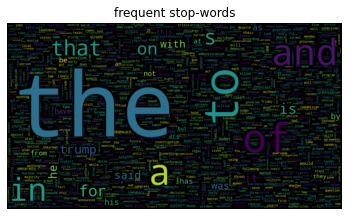

In [22]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
wordcloud = WordCloud(width=900,height=500, max_words=1628,relative_scaling=1,normalize_plurals=False).generate_from_frequencies(frequency_dist)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('frequent stop-words')
plt.show()

In [92]:
%matplotlib inline

from wordcloud import WordCloud

all_words = ' '.join([text for text in df.article])

wordcloud = WordCloud(width= 800, height= 500,
                          max_font_size = 110,
                          collocations = False).generate(all_words)

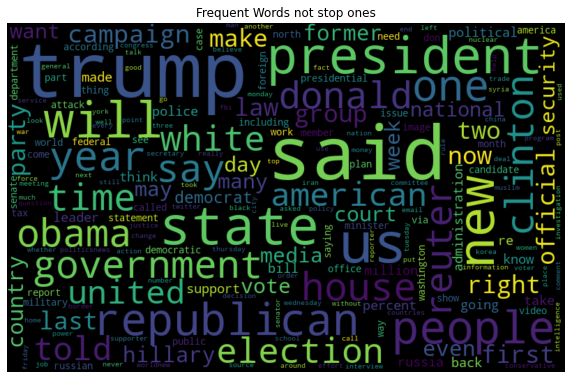

In [93]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Frequent Words not stop ones")
plt.show()

**Method one : Building a Classifier**


In [94]:
df.shape #22449

(44898, 2)

In [95]:
import seaborn as sns
import nltk
    
def pareto(text, column_text, quantity):
    all_words = ' '.join([text for text in text[column_text]])
    token_phrase = token_space.tokenize(all_words)
    frequency = nltk.FreqDist(token_phrase)
    df_frequency = pd.DataFrame({"Word": list(frequency.keys()),
                                   "Frequency": list(frequency.values())})
    df_frequency = df_frequency.nlargest(columns = "Frequency", n = quantity)
    plt.figure(figsize=(12,8))
    ax = sns.barplot(data = df_frequency, x = "Word", y = "Frequency", color = 'blue')
    ax.set(ylabel = "Count")
    plt.show()

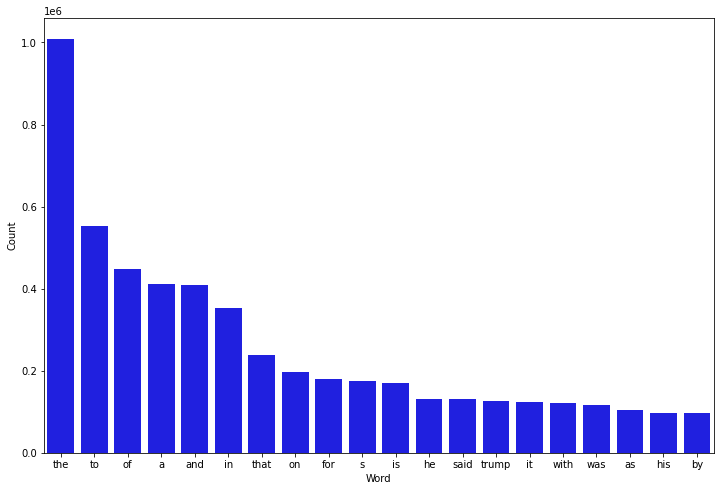

In [97]:
#The 20 more frequent words.
from nltk import tokenize
token_space = tokenize.WhitespaceTokenizer()

pareto(df, "article", 20)

**We will create the BOW and the TF-IDF.**

In [98]:
from sklearn.feature_extraction.text import CountVectorizer

#Creating the bag of words
bow_article = CountVectorizer().fit(df['article'])

article_vect = bow_article.transform(df['article'])

**Text corpus to feature vector conversion TF-IDF**

In [99]:
from sklearn.feature_extraction.text import TfidfTransformer

tfidf_transformer = TfidfTransformer().fit(article_vect)
news_tfidf = tfidf_transformer.transform(article_vect)
print(news_tfidf.shape)

(44898, 249606)


In [103]:
#We will use 30% of the data to train the models.

from sklearn.model_selection import train_test_split
X = news_tfidf
y = df['fake/true'] 

X_train, X_test, Y_train,Y_test= train_test_split(X, y, test_size=0.3)

**Modelling**

In [109]:
#Naive Bayes model
from sklearn.naive_bayes import MultinomialNB

fakenews_predictor = MultinomialNB().fit(X_train, Y_train)

In [110]:
from  sklearn.metrics  import accuracy_score
predicted = fakenews_predictor.predict(X_test)
print(accuracy_score(Y_test,predicted))

0.9429844097995546


In [111]:
print(predicted)

['True' 'True' 'True' ... 'Fake' 'True' 'Fake']


In [112]:
# viewing the report
from sklearn.metrics import classification_report
print (classification_report(Y_test, predicted))

              precision    recall  f1-score   support

        Fake       0.93      0.96      0.95      6992
        True       0.95      0.93      0.94      6478

    accuracy                           0.94     13470
   macro avg       0.94      0.94      0.94     13470
weighted avg       0.94      0.94      0.94     13470



**Support Vector Machine to transform data inorder to get optimal boundary**

In [113]:
from sklearn.linear_model import SGDClassifier

fake_predictor_svc = SGDClassifier().fit(X_train, Y_train)

In [116]:
svm_pred = fake_predictor_svc.predict(X_test)
print(accuracy_score(Y_test,svm_pred))

0.9916109873793616


In [118]:
# viewing the report
print (classification_report(Y_test, svm_pred))

              precision    recall  f1-score   support

        Fake       0.99      0.99      0.99      6992
        True       0.99      0.99      0.99      6478

    accuracy                           0.99     13470
   macro avg       0.99      0.99      0.99     13470
weighted avg       0.99      0.99      0.99     13470



**Logistic regression calculates the prob. of a binary result happening**

In [119]:
from sklearn.linear_model import LogisticRegression

fake_predictor_logistic = LogisticRegression().fit(X_train, Y_train)

In [120]:
predictions_log_reg = fake_predictor_logistic.predict(X_test)
print (classification_report(Y_test, predictions_log_reg))

              precision    recall  f1-score   support

        Fake       0.99      0.99      0.99      6992
        True       0.99      0.99      0.99      6478

    accuracy                           0.99     13470
   macro avg       0.99      0.99      0.99     13470
weighted avg       0.99      0.99      0.99     13470

